In [1]:
import ROOT
ROOT.gSystem.Load("/home/dhruv/RooUnfold/libRooUnfold")
from ROOT import gRandom, TH1, TH1D, cout


from ROOT import RooUnfoldResponse
from ROOT import RooUnfold
from ROOT import RooUnfoldBayes
from ROOT import RooUnfoldSvd
from ROOT import RooUnfoldTUnfold


from matplotlib import pyplot as plt
ROOT.gStyle.SetOptStat('')
from AtlasCommonUtils import SetAtlasStyle
#from Legend import Legend
from ROOT import TLatex
from array import array

ROOT.gStyle.SetPalette(ROOT.kViridis);


import numpy as np


Welcome to JupyROOT 6.16/00


### Get Data and MC files

# pp and pPb Comparison

In [4]:
MCfile_name_pp = '/home/dhruv/17l3b_16_10bins_halfGeV20GeV_1Mevents.root'
#MCfile_name_pp = '/home/dhruv/16k5a_1_37bins_publishedBinning20GeV_1Mevents_normalizeRecoAll_publishedCuts.root'
#MCfile_name_pp = '/home/dhruv/16k5a_16_37bins_publishedBinning20GeV_1Mevents_noNormalize_allReco.root'
#MCfile_name_pp = '/home/dhruv/17l3b_16_37bins_publishedBinning20GeV_1Mevents_noNormalize_allReco.root'

Datafile_name_pp = '/home/dhruv/fout_16_17p_new_halfGeV20GeV_tracking.root'

MCfile_pp = ROOT.TFile(MCfile_name_pp)
Datafile_pp = ROOT.TFile(Datafile_name_pp)

#MCfile_name_pA = '/home/dhruv/13b2_16_25bins_0GeV20GeV_1Mevents_lowptEta.root'
#MCfile_name_pA = '/home/dhruv/13b2_16_21bins_1GeV30GeV_4L_Allevents.root'#used for analysis note
#MCfile_name_pA = '/home/dhruv/13b2_16_9bins_1GeV20GeV_100Kevents_hitsITS.root'
#MCfile_name_pA = '/home/dhruv/13b2_16_9bins_1GeV20GeV_1Mevents_hitsITS.root'
MCfile_name_pA = '/home/dhruv/13b2_16_10bins_halfGeV20GeV_1Mevents.root'
#MCfile_name_pA = '/home/dhruv/13b2_16_51bins_publishedBinning15GeV_1Mevents_noNormalize_allReco.root'

#Datafile_name_pA = '/home/dhruv/fout_16_13b_3run_pPb_1GeV30GeV_trig_pileup_4lL.root'
#Datafile_name_pA = '/home/dhruv/fout_16_13b_ppTracking.root'
Datafile_name_pA = '/home/dhruv/fout_16_13b_halfGeV20GeV_tracking.root'


MCfile_pA = ROOT.TFile(MCfile_name_pA)
Datafile_pA = ROOT.TFile(Datafile_name_pA)

### Get response Matrix and plot it, also true/reco ratio

# Data Spectrum

3.44690183598
1.65753343366


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


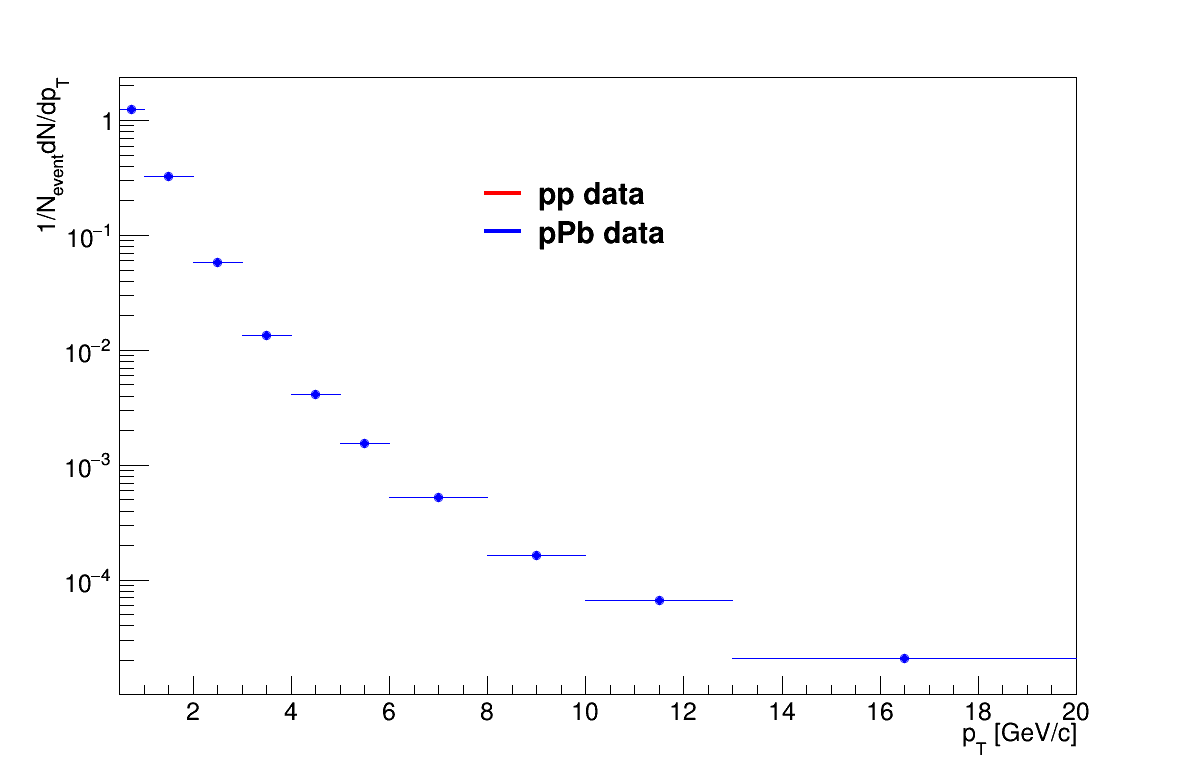

In [10]:
data_pp = Datafile_pp.Get('hReco').Clone()
data_pp.ClearUnderflowAndOverflow()
data_pp.GetYaxis().SetRangeUser(1e-5,5)
data_pp.SetLineColor(2)
data_pp.SetMarkerColor(2)
data_pp.SetMarkerStyle(20)
data_pp.SetTitle(';p_{T} [GeV/c];1/N_{event}dN/dp_{T}')
#data_pp.Scale(1/data_pp.Integral())

data_pA = Datafile_pA.Get('hReco').Clone()
data_pA.ClearUnderflowAndOverflow()
data_pA.GetYaxis().SetRangeUser(1e-5,5)
data_pA.SetMinimum(1e-5)
data_pA.SetLineColor(4)
data_pA.SetMarkerColor(4)
data_pA.SetMarkerStyle(20)
data_pA.SetTitle(';p_{T} [GeV/c];1/N_{event}dN/dp_{T}')
data_pA.Scale(1.0/7.0)


print data_pp.Integral()
print data_pA.Integral()


c = ROOT.TCanvas('c','c',1200,800)

data_pA.Draw('e')
#data_pp.Draw('esame')
c.SetLogy()

label = Legend("")
label.Add(data_pp, 'pp data','L')
label.Add(data_pA, 'pPb data','L')
label.Draw(.4, .8)

c.Draw()
#c.SaveAs('dataSpectrum_tracking_compare_sameBinning.png')
#c.SaveAs('dataSpectrum_tracking_pPb-pp_sameBinning.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


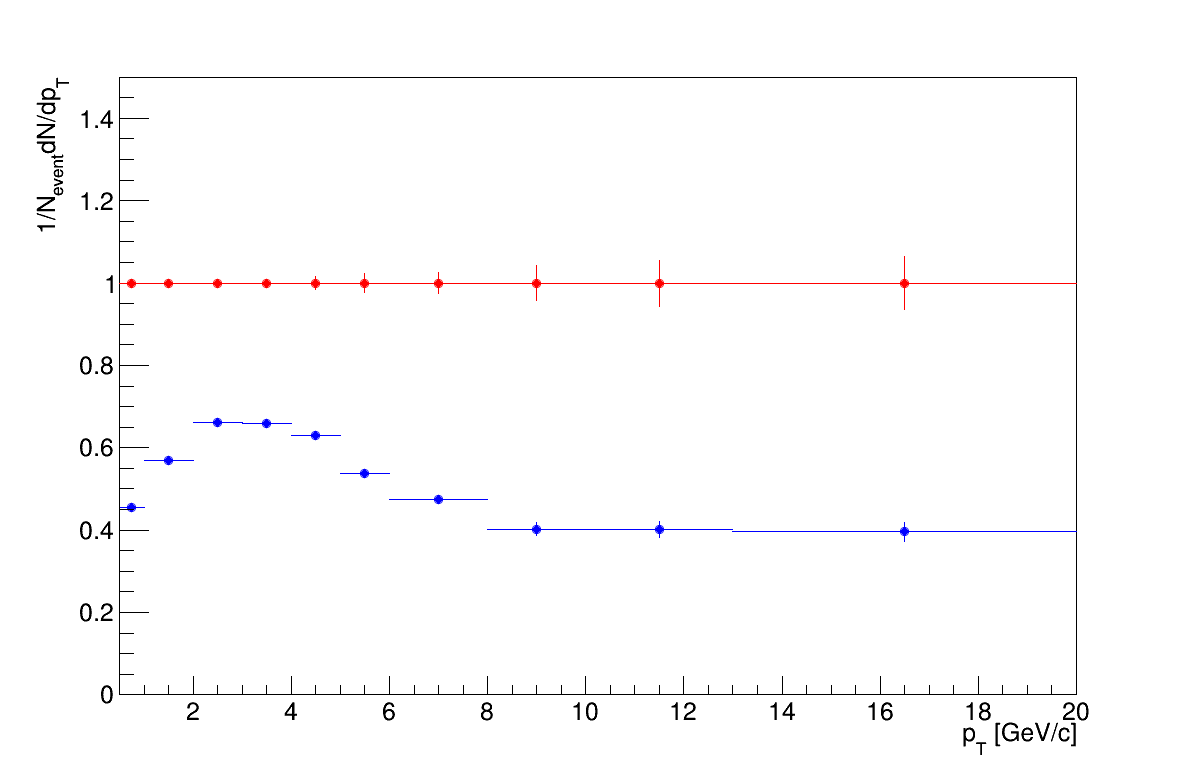

In [116]:
ratio_pAp_measured = data_pA.Clone()
ratio_pAp_measured.Divide(data_pp)
ratio_pAp_measured.GetYaxis().SetRangeUser(0,1.5)

ratio_unity = data_pp.Clone()
ratio_unity.Divide(data_pp)

c= ROOT.TCanvas('c','c',1200,800)
ratio_pAp_measured.Draw('e')
ratio_unity.Draw('same')
c.Draw()

### DEFINE DATA FOR UNFOLDING 

Warning in <TFile::Append>: Replacing existing TH1: binned_data (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


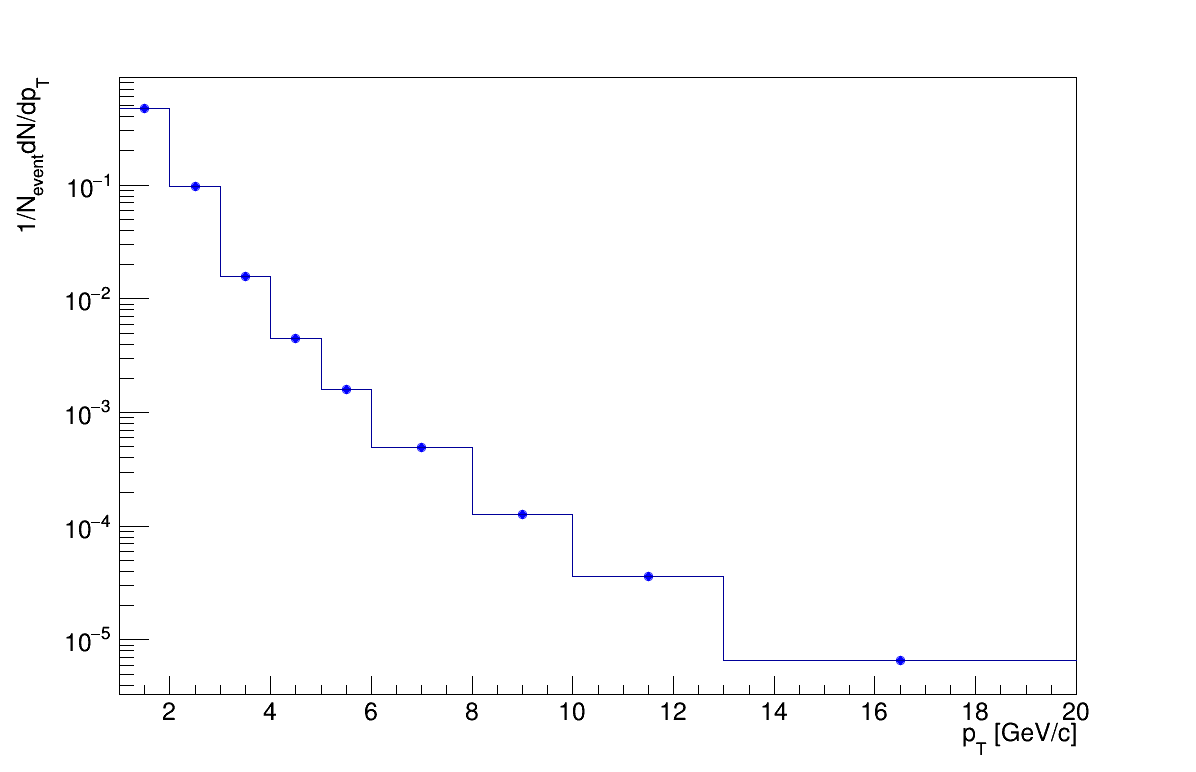

In [124]:
#pp
nbinstrack = 9
track_bins = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 13.0, 20.0], dtype='float64')
published_content = np.array([4.70E-01, 9.80E-02, 1.58E-02, 4.52E-03, 1.59E-03, 
                              4.90E-04, 1.27E-04, 3.64E-05, 6.66E-06], dtype='float64')
published_error = np.array([1.41E-04, 6.16E-05, 1.73E-05, 5.26E-06, 3.08E-06, 
                            1.20E-06, 6.04E-07, 2.63E-07, 7.34E-08], dtype='float64')

#nbinstrack = 10
#track_bins = np.array([0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 13.0, 20.0], dtype='float64')
#published_content = np.array([1.11E+00, 4.70E-01, 9.80E-02, 1.58E-02, 4.52E-03, 1.59E-03, 
#                              9.80E-04, 2.53E-04, 1.09E-04, 4.66E-05], dtype='float64')
#published_error = np.array([2.69E-04, 1.41E-04, 6.16E-05, 1.73E-05, 5.26E-06, 3.08E-06, 
#                            2.39E-06, 1.21E-06, 7.89E-07, 5.13E-07], dtype='float64')


h = ROOT.TH1F('binned_data','', nbinstrack, track_bins)
for i in range(nbinstrack):
    h.SetBinContent(i+1, published_content[i])
    h.SetBinError(i+1, published_error[i])

h.SetTitle(';p_{T} [GeV/c];1/N_{event}dN/dp_{T}')
h.SetMarkerStyle(20)
h.SetMarkerColor(ROOT.kBlue)


c= ROOT.TCanvas('c','c',1200,800)
h.Draw('histe')
c.SetLogy()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: binned_data_pPb (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: binned_data_pPb (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


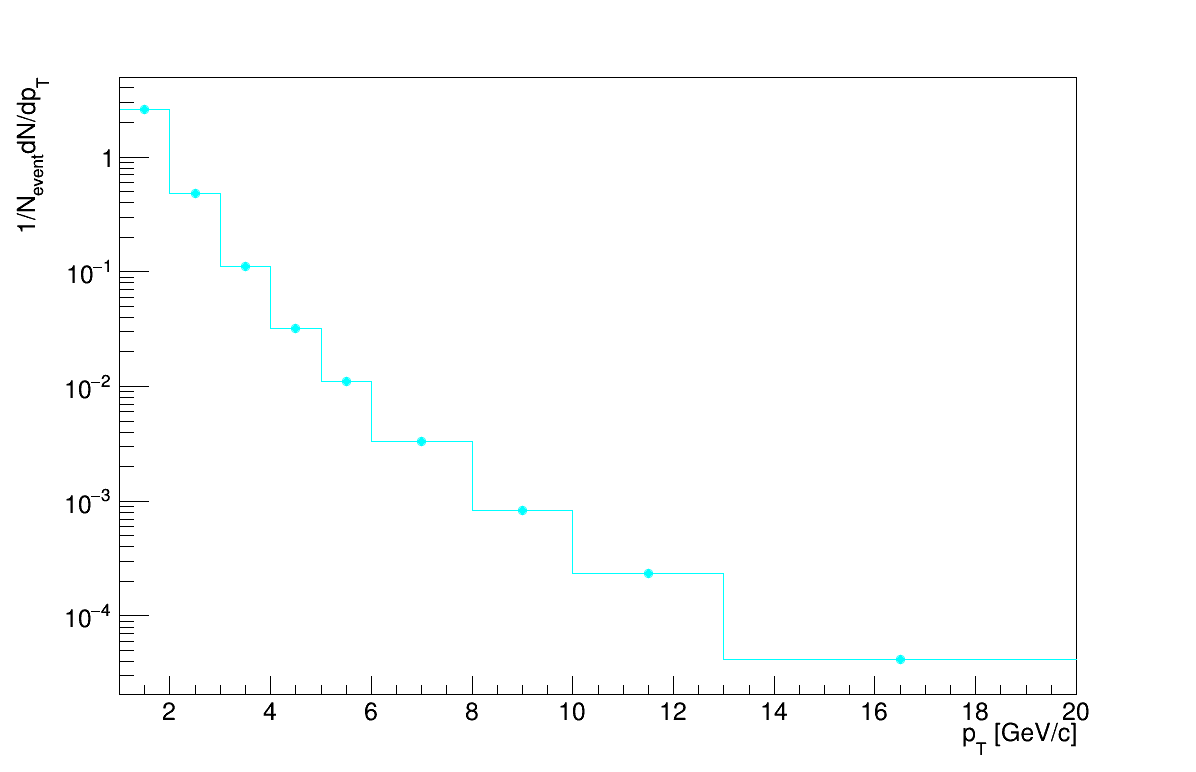

In [103]:
#pPb
nbinstrack_pA = 9
track_bins_pA = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 13.0, 20.0], dtype='float64')
published_content_pA = np.array([2.62E+00, 4.85E-01, 1.11E-01, 3.19E-02, 1.10E-02, 
                                 3.30E-03, 8.25E-04, 2.34E-04, 4.16E-05], dtype='float64')
published_error_pA = np.array([4.87E-04, 1.45E-04, 6.84E-05, 2.30E-05, 1.34E-05,
                            6.32E-06, 2.52E-06, 1.33E-06, 4.72E-07], dtype='float64')


h_pA = ROOT.TH1F('binned_data_pPb','', nbinstrack_pA, track_bins_pA)
for i in range(nbinstrack):
    h_pA.SetBinContent(i+1, published_content_pA[i])
    h_pA.SetBinError(i+1, published_error_pA[i])
    

h_pA.SetTitle(';p_{T} [GeV/c];1/N_{event}dN/dp_{T}')
h_pA.SetMarkerStyle(20)
h_pA.SetMarkerColor(7)
h_pA.SetLineColor(7)

c= ROOT.TCanvas('c','c',1200,800)
h_pA.Draw('histe')
c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file data_published_spectra.png has been created


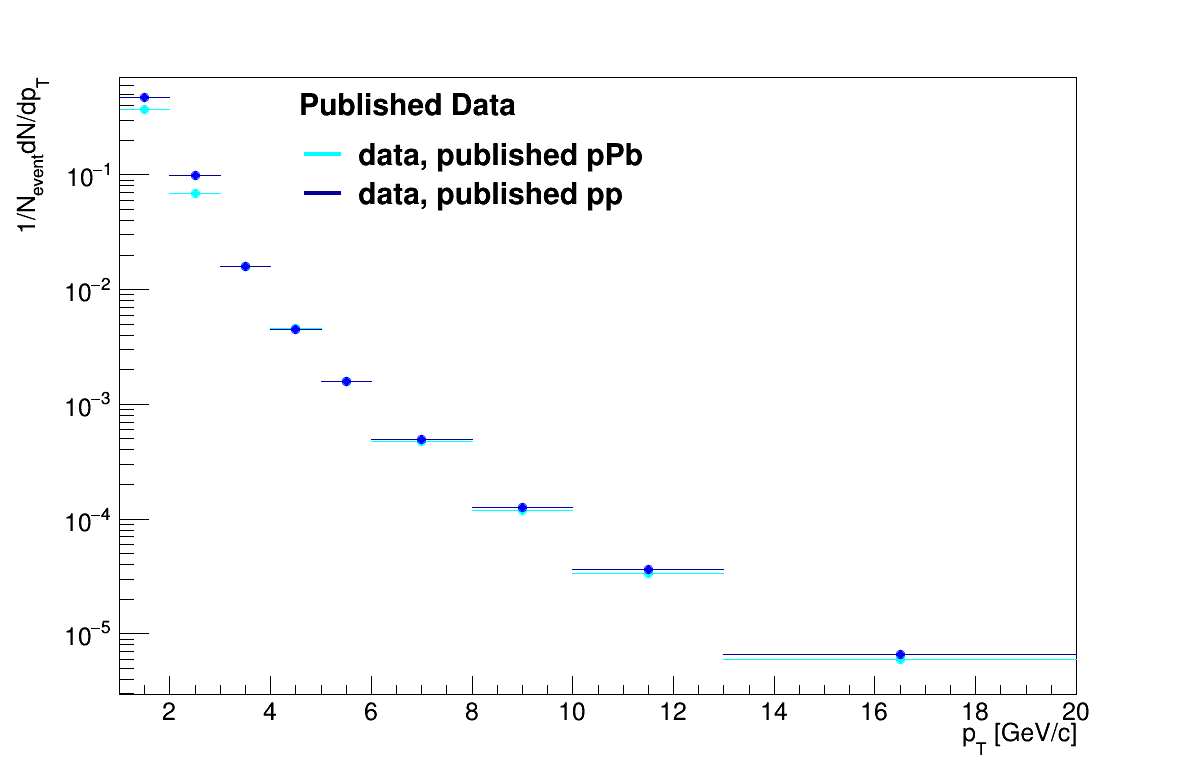

In [104]:
h_pA.Scale(1.0/7.0)
c= ROOT.TCanvas('c','c',1200,800)
h_pA.Draw('e')
h.Draw('esame')

label = Legend("Published Data")
label.Add(h_pA,'data, published pPb','L')
label.Add(h,'data, published pp','L')
label.Draw(.25,.85)

c.SetLogy()
c.Draw()
c.SaveAs('data_published_spectra.png')

### Published Data 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


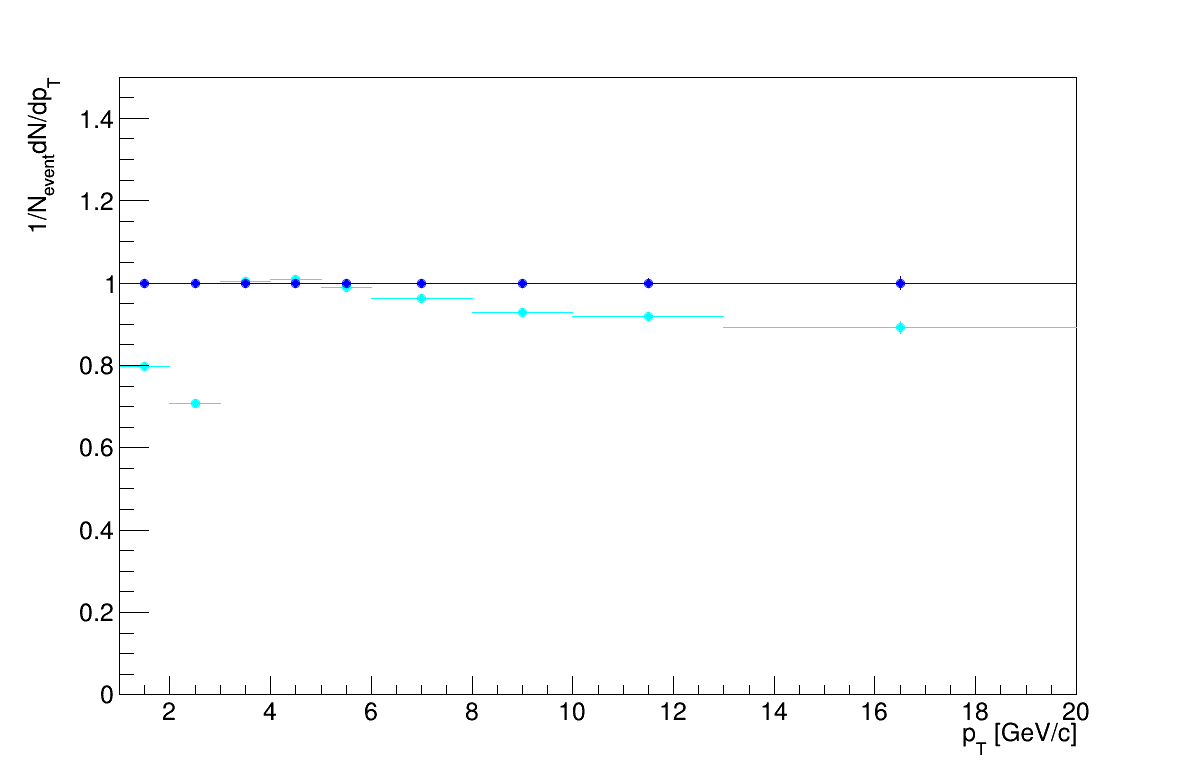

In [106]:
ratio_pAp_published = h_pA.Clone()
ratio_pAp_published.Divide(h)
ratio_pAp_published.GetYaxis().SetRangeUser(0,1.5)

ratio_unity = h.Clone()
ratio_unity.Divide(h)

c= ROOT.TCanvas('c','c',1200,800)
ratio_pAp_published.Draw('e')
ratio_unity.Draw('same')
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


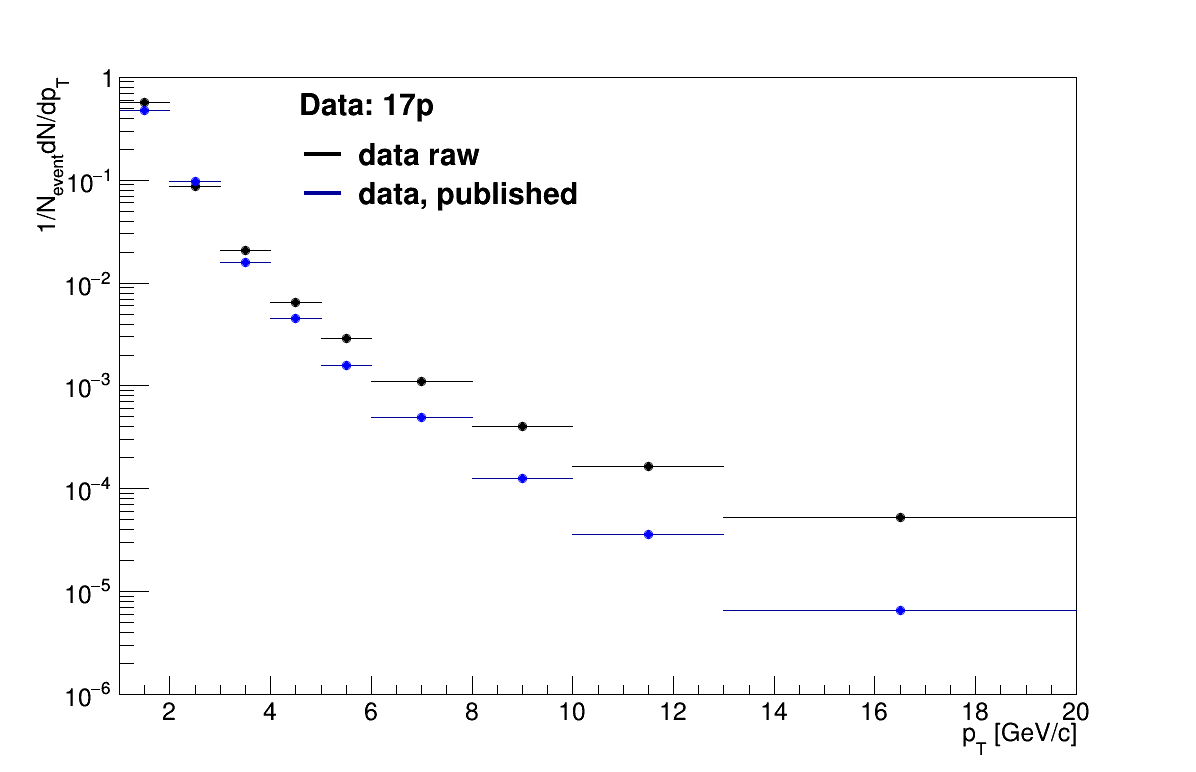

In [82]:
data.GetYaxis().SetRangeUser(1e-6,1)
c= ROOT.TCanvas('c','c',1200,800)
data.Draw('e')
h.Draw('esame')

label = Legend("Data: 17p")
label.Add(data,'data raw','L')
label.Add(h,'data, published','L')
label.Draw(.25,.85)

c.SetLogy()
c.Draw()
#c.SaveAs('data_spectra.png')

# Raw to published

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ratio_rawPublished.png has been created


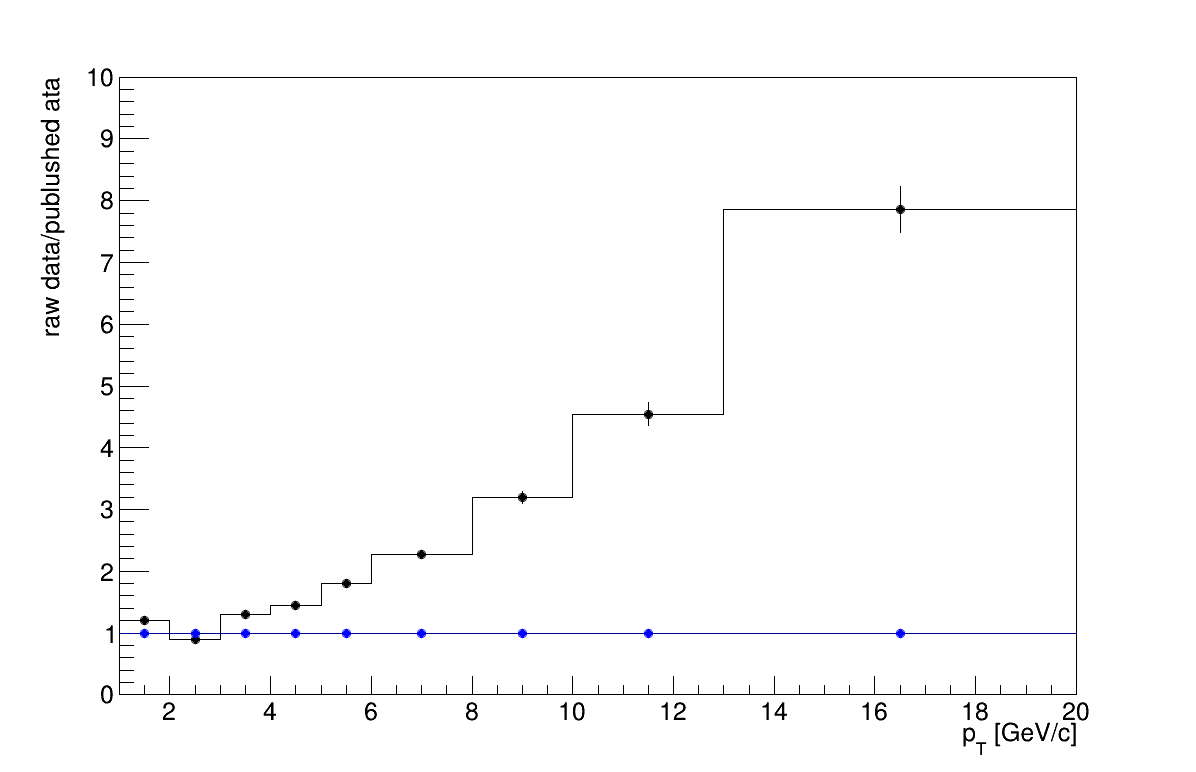

In [51]:
ratio_one = h.Clone()
ratio_one.Divide(h)
ratio_rawPublished = data.Clone()
ratio_rawPublished.Divide(h)

ratio_rawPublished.GetYaxis().SetRangeUser(0,10)

ratio_rawPublished.SetTitle(';p_{T} [GeV/c];raw data/publushed ata')
c= ROOT.TCanvas('c','c',1200,800)
ratio_rawPublished.Draw('histe')
ratio_one.Draw('same')
c.Draw()
c.SaveAs('ratio_rawPublished.png')

# Efficiency

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file EfficiencyFakeRate_tracking_pApp_compare_halfGeV20GeV_publishedBinning.pdf has been created


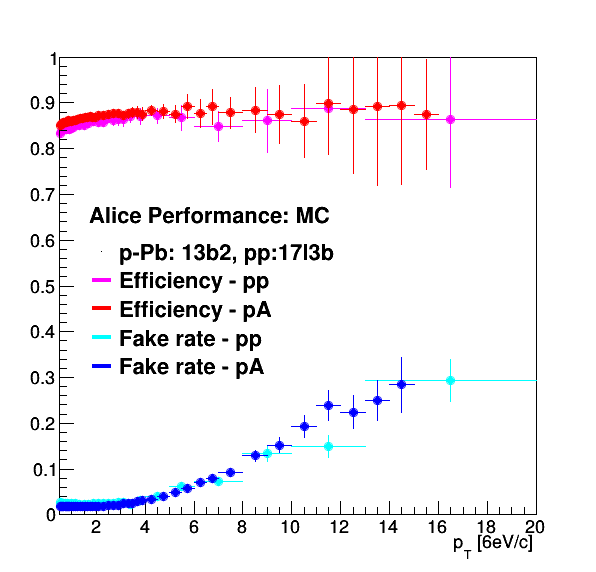

In [24]:
#Get efficiency and fake rate
efficiency_pA = MCfile_pA.Get("hRecoTruth").Clone()#MCfile_pA.Get("Efficiency")
efficiency_pA.Divide(MCfile_pA.Get("hTruth"))
fakerate_pA   = MCfile_pA.Get("FakeRate")

efficiency_pp = MCfile_pp.Get("hRecoTruth").Clone()#MCfile.Get("Efficiency")
efficiency_pp.Divide(MCfile_pp.Get("hTruth"))
fakerate_pp   = MCfile_pp.Get("FakeRate")

blank  = MCfile_pp.Get("FakeRate")
blank.Clear()

#Plot efficiency and fake rate
efficiency_pp.SetTitle(' ; p_{T} [6eV/c];')
efficiency_pp.SetMarkerStyle(20)
efficiency_pp.SetMarkerColor(6)
efficiency_pp.SetLineColor(6)
efficiency_pp.GetXaxis().SetRangeUser(0.5,20)
efficiency_pp.GetYaxis().SetRangeUser(0.0, 1.0)

efficiency_pA.SetTitle(' ; p_{T} [GeV.c];')
efficiency_pA.SetMarkerStyle(20)
efficiency_pA.SetMarkerColor(2)
efficiency_pA.SetLineColor(2)
efficiency_pA.GetXaxis().SetRangeUser(0.5,20)
efficiency_pA.GetYaxis().SetRangeUser(0.0, 1.0)

#fakerate_pp.GetXaxis().SetRangeUser(0.15,20)
fakerate_pp.SetMarkerStyle(20)
fakerate_pp.SetLineColor(7)
fakerate_pp.SetMarkerColor(7)

fakerate_pA.SetMarkerStyle(20)
fakerate_pA.SetLineColor(4)
fakerate_pA.SetMarkerColor(4)


c = ROOT.TCanvas('c','c',600,600)
efficiency_pp.Draw()
efficiency_pA.Draw('same')
fakerate_pp.Draw('same')
fakerate_pA.Draw('same')
#efficiency_pp.Fit('pol0', '', '', 1,20)
#efficiency_pA.Fit('pol0', '', '', 1,20)


#label = Legend("MC: 13b2_efix_p1")
label = Legend("Alice Performance: MC")
label.Add(blank, "p-Pb: 13b2, pp:17l3b")
label.Add(efficiency_pp,'Efficiency - pp','L')
label.Add(efficiency_pA,'Efficiency - pA','L')
label.Add(fakerate_pp,'Fake rate - pp','L')
label.Add(fakerate_pA,'Fake rate - pA','L')
label.Draw(.15,.61)
c.Draw()
#c.SaveAs('EfficiencyFakeRate_tracking_pApp_compare_halfGeV20GeV.png')
#c.SaveAs('EfficiencyFakeRate_tracking_pApp_compare_halfGeV20GeV_publishedBinning.pdf')


# Resolution

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


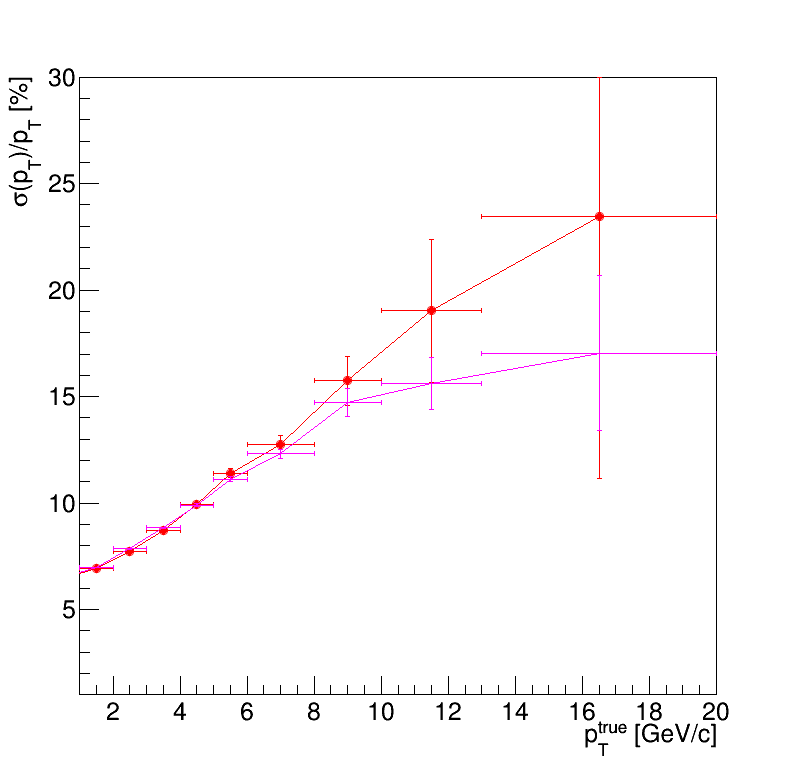

In [5]:
res_pp = MCfile_pp.Get('g_sigma')
res_pA = MCfile_pA.Get('g_sigma')


res_pp.GetXaxis().SetTitle('p_{T}^{true} [GeV/c]')
res_pp.SetMarkerStyle(20)
res_pp.SetMarkerColor(2)
res_pp.SetLineColor(2)

res_pA.GetXaxis().SetTitle('p_{T}^{true} [GeV/c]')
res_pA.SetMarkerStyle(8)
res_pA.SetMarkerColor(6)
res_pA.SetLineColor(6)


res_pp.SetMinimum(0.0)
res_pp.GetXaxis().SetLimits(1.0,20.0)
res_pp.GetYaxis().SetRangeUser(1.0, 30.0)
res_pp.SetTitle('')

res_pA.SetMinimum(0.0)
res_pA.GetXaxis().SetLimits(1.0,20.0)
res_pA.GetYaxis().SetRangeUser(1.0, 30.0)
res_pA.SetTitle('')


c= ROOT.TCanvas('c','c',800,800)

res_pp.Draw('')
res_pA.Draw('same')

#label = Legend("")
#label.Add(res_pp, 'pp resolution','L')
#label.Add(res_pA, 'pPb resolution','L')
#label.Draw(.2, .8)

c.Draw()
#c.SaveAs('ITS_resolution.pdf')
#c.SaveAs('ITS_resolution_20GeV_sameBinning.png')

# Smearing

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


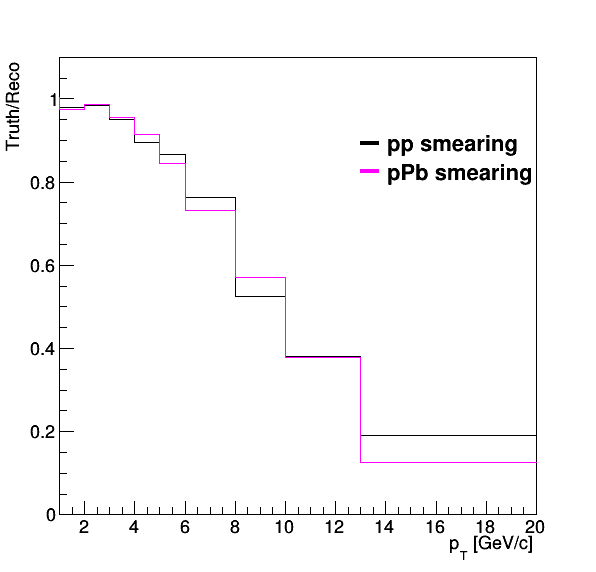

In [61]:
responseMatrix_pp = MCfile_pp.Get("hCorrelation_cor");
responseMatrix_pp.ClearUnderflowAndOverflow()
responseMatrix_pp.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')

responseMatrix_pA = MCfile_pA.Get("hCorrelation_cor");
responseMatrix_pA.ClearUnderflowAndOverflow()
responseMatrix_pA.SetTitle(';Truth p_{T} [GeV/c];Reconstructed p_{T} [GeV/c]')


mc_truth_pp = responseMatrix_pp.ProjectionX()
mc_reco_pp = responseMatrix_pp.ProjectionY()

mc_truth_pA = responseMatrix_pA.ProjectionX()
mc_reco_pA = responseMatrix_pA.ProjectionY()


for i in range(mc_truth_pp.GetNbinsX()):
    binWidth_pp = mc_truth_pp.GetBinWidth(i)
    binCon_truth_pp = mc_truth_pp.GetBinContent(i)
    binCon_reco_pp = mc_reco_pp.GetBinContent(i)
    mc_truth_pp.SetBinContent(i, binCon_truth_pp/binWidth_pp)
    mc_reco_pp.SetBinContent(i, binCon_reco_pp/binWidth_pp)

    
for i in range(mc_truth_pA.GetNbinsX()):
    binWidth_pA = mc_truth_pA.GetBinWidth(i)
    binCon_truth_pA = mc_truth_pA.GetBinContent(i)
    binCon_reco_pA = mc_reco_pA.GetBinContent(i)
    mc_truth_pA.SetBinContent(i, binCon_truth_pA/binWidth_pA)
    mc_reco_pA.SetBinContent(i, binCon_reco_pA/binWidth_pA)


ratio_mc_pp = mc_truth.Clone()
ratio_mc_pp.Divide(mc_reco_pp)
ratio_mc_pp.SetMinimum(0.0)
ratio_mc_pp.SetMaximum(1.1)
ratio_mc_pp.SetLineColor(2)
ratio_mc_pp.SetMarkerColor(2)
ratio_mc_pp.SetMarkerStyle(20)
ratio_mc_pp.GetXaxis().SetRangeUser(0.5,20)
ratio_mc_pp.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')

ratio_mc_pA = mc_truth_pA.Clone()
ratio_mc_pA.Divide(mc_reco_pA)
ratio_mc_pA.SetMinimum(0.0)
ratio_mc_pA.SetMaximum(1.1)
ratio_mc_pA.SetLineColor(6)
ratio_mc_pp.SetMarkerColor(5)
ratio_mc_pA.SetMarkerStyle(20)
ratio_mc_pA.GetXaxis().SetRangeUser(0.5,20)
ratio_mc_pA.SetTitle(' ; p_{T} [GeV/c]; Truth/Reco')



##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',600,600)

ratio_mc.Draw('histe')
ratio_mc_pA.Draw('histesame')

label = Legend("")
label.Add(ratio_mc, 'pp smearing','L')
label.Add(ratio_mc_pA, 'pPb smearing','L')
label.Draw(.6, .8)

c.Draw()

#c.SaveAs('Smearing_ITS_compare_halfGeV20GeV.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file data_spectra.png has been created


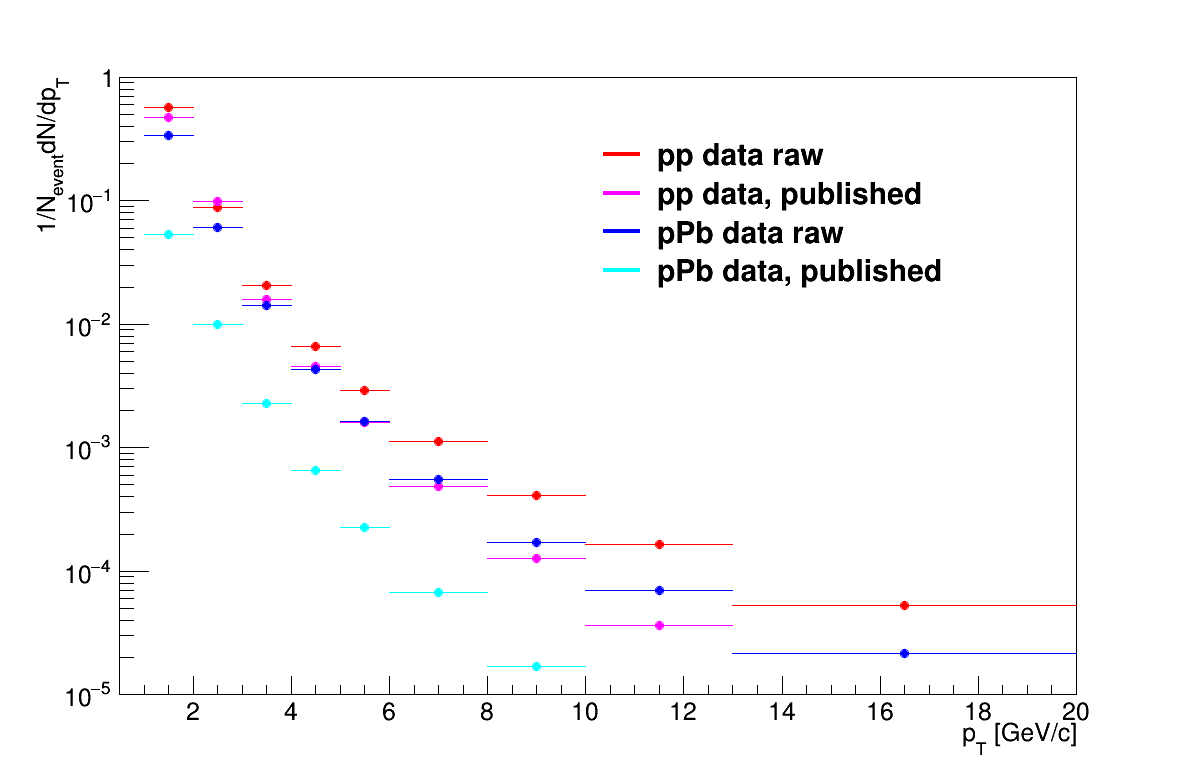

In [65]:
h_pPb.Scale(1.0/7.0)
c= ROOT.TCanvas('c','c',1200,800)
data_pp.Draw('e')
h.Draw('esame')
data_pA.Draw('esame')
h_pPb.Draw('esame')

label = Legend("")
label.Add(data_pp,'pp data raw','L')
label.Add(h,'pp data, published','L')
label.Add(data_pA,'pPb data raw','L')
label.Add(h_pPb,'pPb data, published','L')
label.Draw(.5,.85)

c.SetLogy()
c.Draw()
c.SaveAs('data_spectra.png')

# data vs MC

In [32]:
MCfile_16k5a = ROOT.TFile('/home/dhruv/16k5a_16_37bins_publishedBinning20GeV_1Mevents_noNormalize_allReco.root')
MCfile_17l3 = ROOT.TFile('/home/dhruv/17l3_16_37bins_publishedBinning20GeV_1Mevents_noNormalize_allReco.root')
MCfile_17l3b = ROOT.TFile('/home/dhruv/17l3b_16_37bins_publishedBinning20GeV_1Mevents_noNormalize_allReco.root')
MCfile_17l4 = ROOT.TFile('/home/dhruv/17l4_16_37bins_publishedBinning20GeV_1Mevents_noNormalize_allReco.root')
#Datafile_17p = ROOT.TFile('/home/dhruv/fout_16_37bins_17p_new_publishedBinning20GeV_tracking_addedPileUp_trigCut_1Mevents_noNormalize.root')

MCfile_13b2 = ROOT.TFile('/home/dhruv/13b2_16_37bins_publishedBinning20GeV_1Mevents_noNormalize_allReco.root')
#Datafile_13b = ROOT.TFile('/home/dhruv/fout_16_37bins_13b_publishedBinning20GeV_tracking_addedPileUp_trigCut_1Mevents_noNormalize.root')





Datafile_17p = ROOT.TFile('/home/dhruv/fout_16_37bins_17p_new_publishedBinning20GeV_tracking_addedPileUp_trigCut_1Mevents_normalizeByEventOnly.root')
Datafile_17p1 = ROOT.TFile('/home/dhruv/fout_16_37bins_17p_282030_publishedBinning20GeV_tracking_addedPileUp_trigCut1_removeNtrack_1Mevents_normalizeByEventOnly.root')
Datafile_17p2 = ROOT.TFile('/home/dhruv/fout_16_37bins_17p_3run_sameTrig_publishedBinning20GeV_tracking_addedPileUp_trigCut1_removeNtrack_1Mevents_normalizeByEventOnly.root')
Datafile_17p3 = ROOT.TFile('/home/dhruv/fout_16_37bins_17p_new_publishedBinning20GeV_tracking_addedPileUp_noFastTrig_removeNtrack_1Mevents_normalizeByEventOnly.root')
#Datafile_17p4 = ROOT.TFile('/home/dhruv/fout_16_37bins_17p_3run_sameTrig_publishedBinning20GeV_tracking_addedPileUp_rejectFastTrig_removeNtrack_1Mevents_normalizeByEventOnly.root')
Datafile_17p4 = ROOT.TFile('/home/dhruv/fout_16_37bins_17p_3run_sameTrig_publishedBinning20GeV_tracking_addedPileUp_kINT8_removeNtrack_100Kevents_normalizeByEventOnly.root')
Datafile_15n = ROOT.TFile('/home/dhruv/fout_16_37bins_15n_1run_pppublishedBinning_tracking_kINT7_1MKevents_normalizeByEventOnly.root')
Datafile_15nTPC = ROOT.TFile('/home/dhruv/fout_3_37bins_15n_1run_pass3_pppublishedBinning_tracking_kINT7_1MKevents_normalizeByEventOnly.root')


Datafile_13b = ROOT.TFile('/home/dhruv/fout_16_37bins_13b_publishedBinning20GeV_tracking_addedPileUp_trigCut_1Mevents_normalizeByEventOnly.root')
Datafile_13b_3run = ROOT.TFile('/home/dhruv/fout_16_37bins_13b_3run_publishedBinning20GeV_tracking_addedPileUp_trigCut_1Mevents_normalizeByEventOnly.root')
Datafile_13b_3run_new = ROOT.TFile('/home/dhruv/fout_16_37bins_13b_3run_new_publishedBinning20GeV_tracking_addedPileUp_trigCut_1Mevents_normalizeByEventOnly.root')
Datafile_13bTPC = ROOT.TFile('fout_3_37bins_13b_3run_new_pppublishedBinning_tracking_kINT7_1MKevents_normalizeByEventOnly.root')



Error in <TFile::TFile>: file fout_3_37bins_13b_3run_new_pppublishedBinning_tracking_kINT7_1MKevents_normalizeByEventOnly.root does not exist


In [21]:
nbinstrack_pubpp = 37
track_bins_pubpp = np.array([0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 
                       0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 
                       0.95, 1  , 1.1 , 1.2, 1.4 , 1.6, 1.8 , 2  , 
                       2.2 , 2.4, 2.6 , 2.8, 3   , 3.2, 3.6 , 4  , 
                       5   , 6  , 8   , 10 , 13  , 20], dtype='float64')
published_content_pubpp = np.array([3.38E-01, 3.46E-01, 3.28E-01, 3.01E-01, 2.70E-01, 2.40E-01, 2.11E-01, 1.85E-01, 
                              1.62E-01, 1.42E-01, 1.25E-01, 1.10E-01, 9.70E-02, 8.58E-02, 7.61E-02, 6.77E-02, 
                              6.05E-02, 1.02E-01, 8.14E-02, 1.18E-01, 7.87E-02, 5.32E-02, 3.66E-02, 2.54E-02, 
                              1.80E-02, 1.29E-02, 9.35E-03, 6.85E-03, 5.10E-03, 6.71E-03, 3.96E-03, 4.52E-03, 
                              1.59E-03, 9.80E-04, 2.53E-04, 1.09E-04, 4.66E-05], dtype='float64')
published_error_pubpp = np.array([7.05E-05, 4.91E-05, 4.53E-05, 4.21E-05, 3.90E-05, 3.63E-05, 3.44E-05, 3.03E-05, 
                            3.15E-05, 3.01E-05, 2.90E-05, 2.76E-05, 2.64E-05, 2.52E-05, 2.41E-05, 2.30E-05, 
                            2.17E-05, 2.81E-05, 2.49E-05, 2.92E-05, 2.36E-05, 1.92E-05, 1.58E-05, 2.65E-05, 
                            1.11E-05, 9.31E-06, 7.90E-06, 6.73E-06, 5.78E-06, 6.51E-06, 4.97E-06, 5.26E-06, 
                            3.08E-06, 2.39E-06, 1.21E-06, 7.89E-07, 5.13E-07], dtype='float64')




In [22]:
h_pubpp = ROOT.TH1F('binned_data','', nbinstrack_pubpp, track_bins_pubpp)
for i in range(nbinstrack_pubpp):
    h_pubpp.SetBinContent(i+1, published_content_pubpp[i])
    h_pubpp.SetBinError(i+1, published_error_pubpp[i])

tot_eta = 1.6
h_pubpp.Scale(tot_eta)
#h.Scale(numEvents)

In [23]:
h_16k5a = MCfile_16k5a.Get('hReco_all')
h_17l3  = MCfile_17l3.Get('hReco_all')
h_17l3b = MCfile_17l3b.Get('hReco_all')
h_17l4  = MCfile_17l4.Get('hReco_all')


h_13b2 = MCfile_13b2.Get('hReco_all')


In [24]:
h_17p = Datafile_17p.Get('hReco')
h_17p1 = Datafile_17p1.Get('hReco')
h_17p2 = Datafile_17p2.Get('hReco')
h_17p3 = Datafile_17p3.Get('hReco')
h_17p4 = Datafile_17p4.Get('hReco')
h_15n = Datafile_15n.Get("hReco")

h_13b = Datafile_13b.Get('hReco')
h_13b_3run = Datafile_13b_3run.Get('hReco')
h_13b_3run_new = Datafile_13b_3run_new.Get('hReco')

In [25]:
#h_17p.Scale(6.708)
#h_pubpp.Scale(6.708)

#h_13b.Scale(1/6.708)
#h_13b_3run.Scale(1/6.708)
h_13b_3run_new.Scale(1/6.708)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


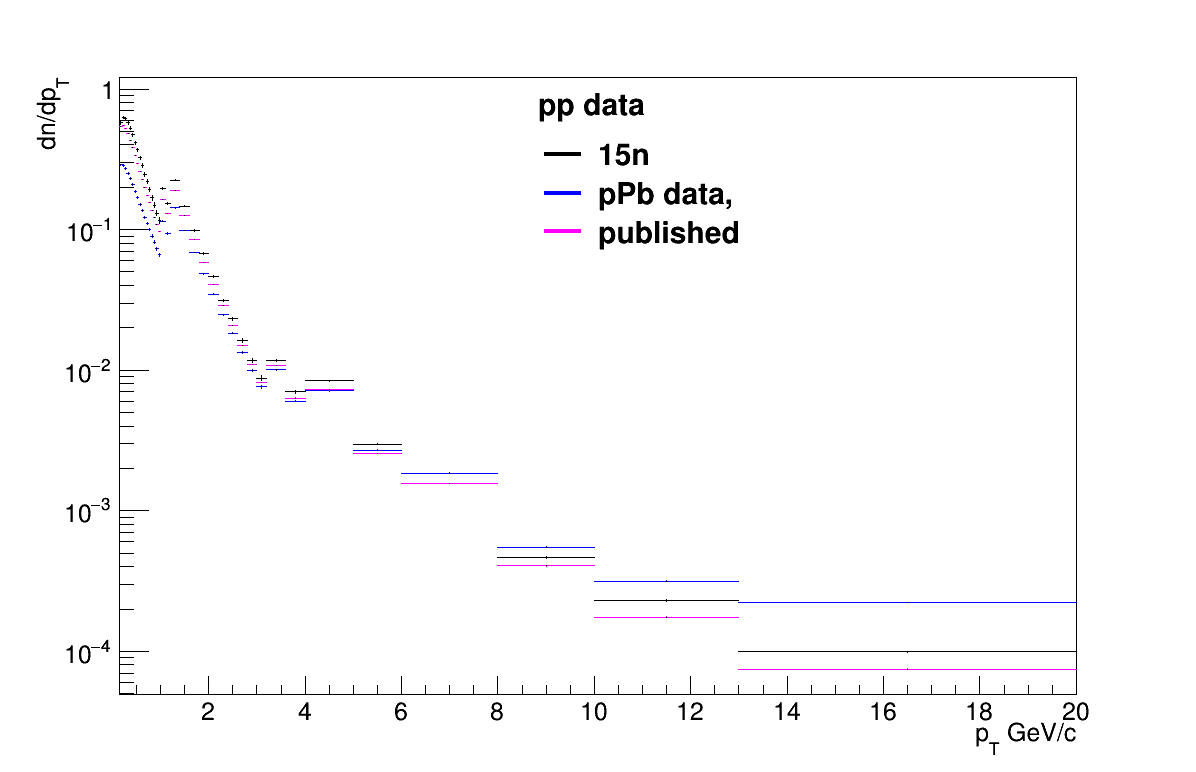

In [26]:
h_17p.GetYaxis().SetRangeUser(1e-5,1)
h_15n.SetLineColor(1)
#h_17p.SetLineColor(1)
#h_17p1.SetLineColor(2)
#h_17p2.SetLineColor(3)
#h_17p3.SetLineColor(4)
#h_17p4.SetLineColor(7)
#h_13b.SetLineColor(2)
#h_13b_3run.SetLineColor(3)
h_13b_3run_new.SetLineColor(4)
h_pubpp.SetLineColor(6)

c= ROOT.TCanvas('c','c',1200,800)
h_15n.Draw('e')
#h_17p.Draw('e')
#h_17p1.Draw('esame')
#h_17p2.Draw('esame')
#h_17p3.Draw('esame')
#h_17p4.Draw('samehist')
#h_13b.Draw('esame')
#h_13b_3run.Draw('esame')
h_13b_3run_new.Draw('esame')
h_pubpp.Draw('esame')

h_17p.SetTitle(";p_{T} [GeV/c];#frac{1}{N_{event}}count")
label = Legend("pp data")
label.Add(h_15n,'15n','L')
#label.Add(h_17p,'orginal','L')
#label.Add(h_17p3,'orignal but no \"CINT7-FAST\" ','L')
#label.Add(h_17p1,'run 282030','L')
#label.Add(h_17p2,'new Ntuple ','L')
#label.Add(h_17p4,'new Ntuple with fast reject','L')
#label.Add(h_13b,'pPb data, ','L')
#label.Add(h_13b_3run,'pPb data, ','L')
label.Add(h_13b_3run_new,'pPb data, ','L')
label.Add(h_pubpp,'published','L')
label.Draw(.45,.85)

c.SetLogy()
c.Draw()
#c.SaveAs('pp_data_measuredAndPub.png')

In [27]:
for i in range(1, h_pubpp.GetNbinsX()+1):
    print h_pubpp.GetBinLowEdge(i), '\t', h_pubpp.GetBinContent(i), '\t\t', h_13b_3run_new.GetBinContent(i), '\t\t', h_15n.GetBinContent(i)

0.15 	0.540799975395 		0.288705319166 		0.574940800667
0.2 	0.553599953651 		0.287092030048 		0.628209888935
0.25 	0.524800002575 		0.272512763739 		0.612313985825
0.3 	0.481599986553 		0.251631736755 		0.575766742229
0.35 	0.432000011206 		0.22984790802 		0.527283608913
0.4 	0.384000003338 		0.208379298449 		0.473880082369
0.45 	0.337599992752 		0.186777964234 		0.416644662619
0.5 	0.296000003815 		0.169554799795 		0.369187504053
0.55 	0.259200006723 		0.150779798627 		0.323495835066
0.6 	0.227200001478 		0.136821582913 		0.285490423441
0.65 	0.20000000298 		0.122203275561 		0.247252911329
0.7 	0.175999999046 		0.110211357474 		0.218564778566
0.75 	0.155200004578 		0.100115604699 		0.192492067814
0.8 	0.137280002236 		0.0896397456527 		0.168192863464
0.85 	0.121759995818 		0.0814837962389 		0.148828417063
0.9 	0.108319997787 		0.0730760917068 		0.130912542343
0.95 	0.0967999994755 		0.0660226270556 		0.116181917489
1.0 	0.163199990988 		0.114873893559 		0.196040675044
1.1 	0.130239993

In [29]:
ratio_one = h_pubpp.Clone()
#ratio_17p = h_17p.Clone()
#ratio_17p1 = h_17p1.Clone()
#ratio_17p2 = h_17p2.Clone()
#ratio_17p3 = h_17p3.Clone()
#ratio_17p4 = h_17p4.Clone()
ratio_15n = h_15n.Clone()
#ratio_13b = h_13b.Clone()
#ratio_13b_3run = h_13b_3run.Clone()
#ratio_13b_3run_new = h_13b_3run_new.Clone()

ratio_one.Divide(h_pubpp)
#ratio_17p.Divide(h_pubpp)
#ratio_17p1.Divide(h_pubpp)
#ratio_17p2.Divide(h_pubpp)
#ratio_17p3.Divide(h_pubpp)
#ratio_17p4.Divide(h_pubpp)
ratio_15n.Divide(h_pubpp)
#ratio_13b.Divide(h_pubpp)
#ratio_13b_3run.Divide(h_pubpp)
#ratio_13b_3run_new.Divide(h_pubpp)

#ratio_one.Divide(h_13b_3run_new)
#ratio_17p.Divide(h_13b_3run_new)
#ratio_17p1.Divide(h_13b_3run_new)
#ratio_17p2.Divide(h_13b_3run_new)
#ratio_13b.Divide(h_13b_3run_new)
#ratio_13b_3run.Divide(h_13b_3run_new)
#ratio_13b_3run_new.Divide(h_13b_3run_new)

True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ratio_pp_data_measuredAndPub_tpc.png has been created


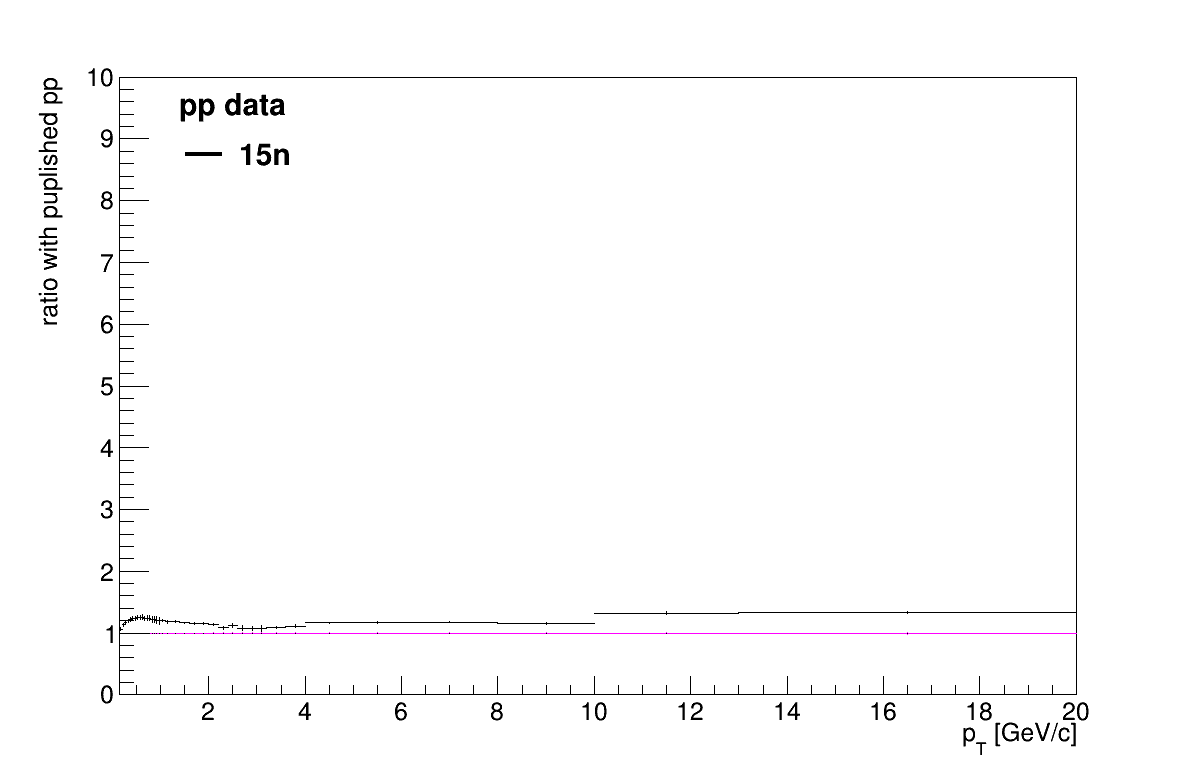

In [31]:
ratio_one.SetTitle(";p_{T} [GeV/c];ratio with puplished pp")
ratio_one.GetYaxis().SetRangeUser(0,10)
c= ROOT.TCanvas('c','c',1200,800)
ratio_one.Draw('')
#ratio_17p.Draw('esame')
#ratio_17p1.Draw('esame')
#ratio_17p2.Draw('esame')
#ratio_17p3.Draw('esame')
#ratio_17p4.Draw('esame')

ratio_15n.Draw('esame')


#ratio_13b.Draw('esame')
#ratio_13b_3run.Draw('esame')
#ratio_13b_3run_new.Draw('esame')

label = Legend("pp data")
label.Add(ratio_15n,'15n','L')
#label.Add(ratio_17p,'orginal','L')
#label.Add(ratio_17p3,'orignal but no \"CINT7-FAST\" ','L')
#label.Add(ratio_17p1,'run 282030','L')
#label.Add(ratio_17p2,'new Ntuple ','L')
#label.Add(ratio_17p4,'new Ntuple with fast reject','L')

#label.Add(ratio_13b,'pPb data, ','L')
#label.Add(ratio_13b_3run,'pPb data, ','L')
#label.Add(ratio_13b_3run_new,'pPb data, ','L')
label.Draw(.15,.85)

c.Draw()
c.SaveAs('ratio_pp_data_measuredAndPub_tpc.png')

In [ ]:
hEventCuts_pPb = 